In [1]:
# import lybrary
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [2]:
# Load dataframe

df = pd.read_csv("D:\Data Analyst\Pacmann\Statistic for Business\Project 1\Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
# Replace Column name that contain space with "_"

df.rename(columns={'Sleep Duration': 'Sleep_Duration'}, inplace=True)
df.rename(columns={'Quality of Sleep': 'Quality_of_Sleep'}, inplace=True)
df.rename(columns={'Physical Activity Level': "Physical_Activity_Level"}, inplace=True)
df.rename(columns={'Stress Level': "Stress_Level"}, inplace=True)
df.rename(columns={'BMI Category': "BMI_Category"}, inplace=True)
df.rename(columns={'Blood Pressure': "Blood_Pressure"}, inplace=True)
df.rename(columns={'Heart Rate': "Heart_Rate"}, inplace=True)
df.rename(columns={'Daily Steps': "Daily_Steps"}, inplace=True)
df.rename(columns={'Sleep Disorder': "Sleep_Disorder"}, inplace=True)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep_Duration           374 non-null    float64
 5   Quality_of_Sleep         374 non-null    int64  
 6   Physical_Activity_Level  374 non-null    int64  
 7   Stress_Level             374 non-null    int64  
 8   BMI_Category             374 non-null    object 
 9   Blood_Pressure           374 non-null    object 
 10  Heart_Rate               374 non-null    int64  
 11  Daily_Steps              374 non-null    int64  
 12  Sleep_Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
# Chek duplicate value
df.duplicated().sum()

0

In [6]:
# Chek missing value
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep_Duration               0
Quality_of_Sleep             0
Physical_Activity_Level      0
Stress_Level                 0
BMI_Category                 0
Blood_Pressure               0
Heart_Rate                   0
Daily_Steps                  0
Sleep_Disorder             219
dtype: int64

In [7]:
df['Sleep_Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

Nan value in Sleep_Disorder column is there is no occure sleep disorder, so we can say Sleep Good


In [8]:
# Replace Nan value with 'Sleep Good'
df['Sleep_Disorder'] = df['Sleep_Disorder'].fillna('Sleep Good')

In [9]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep_Duration             0
Quality_of_Sleep           0
Physical_Activity_Level    0
Stress_Level               0
BMI_Category               0
Blood_Pressure             0
Heart_Rate                 0
Daily_Steps                0
Sleep_Disorder             0
dtype: int64

In [10]:
df.groupby(['BMI_Category']).size()

BMI_Category
Normal           195
Normal Weight     21
Obese             10
Overweight       148
dtype: int64

BMI Category contain Normal and Normal Category that same meaning so unite to Normal

In [11]:
df['BMI_Category'] = df['BMI_Category'].replace('Normal Weight', 'Normal')

In [12]:
df.groupby(['BMI_Category']).size()

BMI_Category
Normal        216
Obese          10
Overweight    148
dtype: int64

In [13]:
df.shape

(374, 13)

In [14]:
# Remove person+id (not use)
df = df.drop('Person ID', axis=1)


In [15]:
df.head()

,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily_Steps,Sleep_Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Sleep Good
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Sleep Good
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Sleep Good
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### EDA

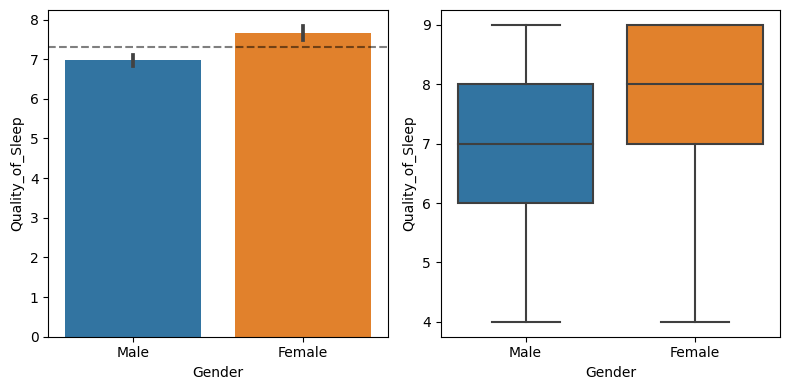

In [16]:
# bar plot and boxplot Quality of sleep based on Gender
fig, axs = plt.subplots(nrows = 1, ncols=2, figsize=(8,4))

sns.barplot(data=df, x='Gender', y= 'Quality_of_Sleep', ax=axs[0])
axs[0].axhline(df['Quality_of_Sleep'].mean(), ls='--', c='black', alpha=0.5)

sns.boxplot(data=df, x='Gender', y= 'Quality_of_Sleep', ax=axs[1])

plt.tight_layout()
plt.show()

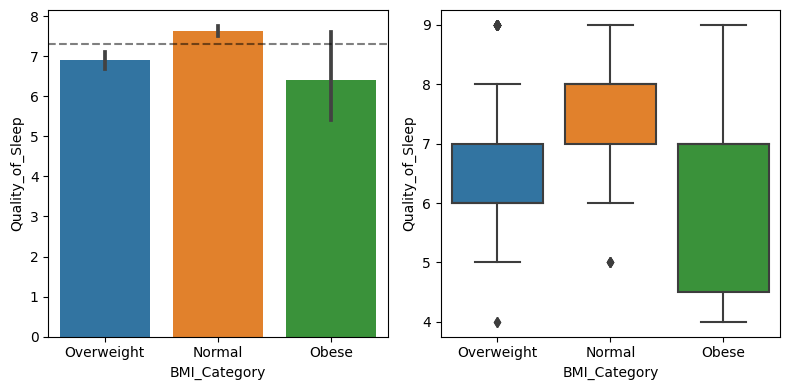

In [17]:
# bar plot and boxplot Quality of sleep based on BMI Category
fig, axs = plt.subplots(nrows = 1, ncols=2, figsize=(8,4))

sns.barplot(data=df, x='BMI_Category', y= 'Quality_of_Sleep', ax=axs[0])
axs[0].axhline(df['Quality_of_Sleep'].mean(), ls='--', c='black', alpha=0.5)

sns.boxplot(data=df, x='BMI_Category', y= 'Quality_of_Sleep', ax=axs[1])

plt.tight_layout()
plt.show()

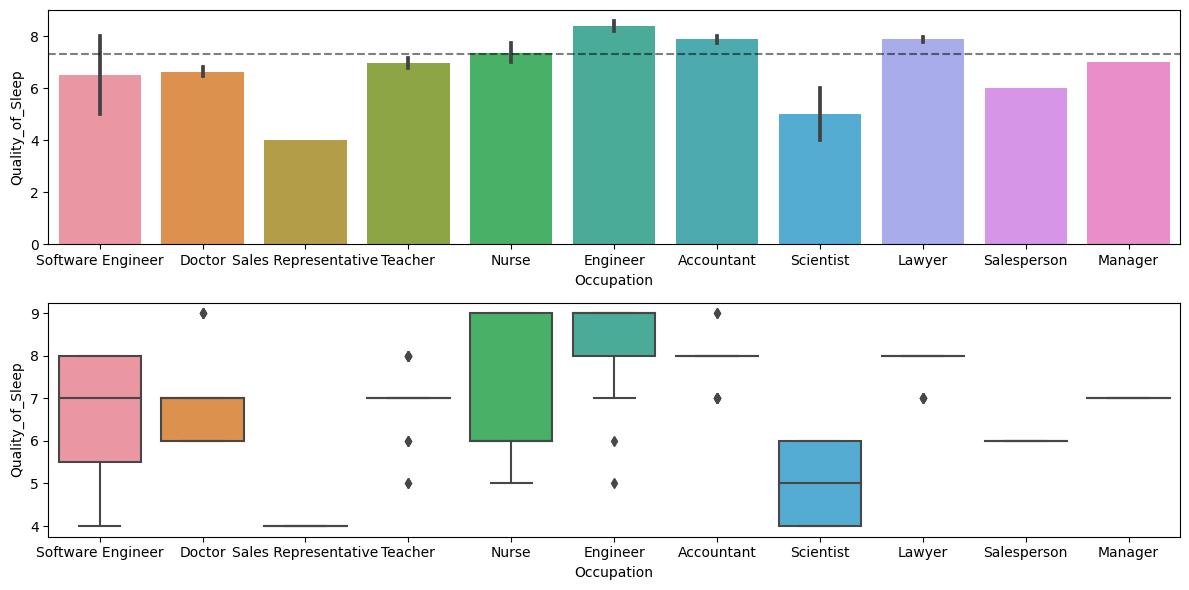

In [18]:
# bar plot and boxplot Quality of sleep based on Occupation
fig, axs = plt.subplots(nrows = 2, ncols=1, figsize=(12,6))

sns.barplot(data=df, x='Occupation', y= 'Quality_of_Sleep', ax=axs[0])
axs[0].axhline(df['Quality_of_Sleep'].mean(), ls='--', c='black', alpha=0.5)

sns.boxplot(data=df, x='Occupation', y= 'Quality_of_Sleep', ax=axs[1])

plt.tight_layout()
plt.show()

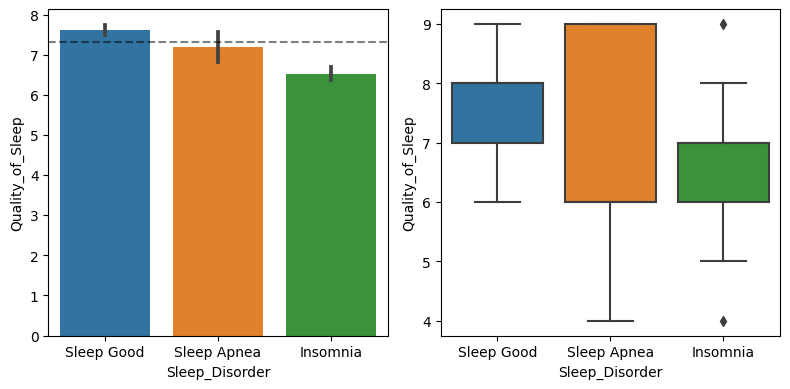

In [19]:
# bar plot and boxplot Quality of sleep based on Sleep Disorder
fig, axs = plt.subplots(nrows = 1, ncols=2, figsize=(8,4))

sns.barplot(data=df, x='Sleep_Disorder', y= 'Quality_of_Sleep', ax=axs[0])
axs[0].axhline(df['Quality_of_Sleep'].mean(), ls='--', c='black', alpha=0.5)

sns.boxplot(data=df, x='Sleep_Disorder', y= 'Quality_of_Sleep', ax=axs[1])

plt.tight_layout()
plt.show()

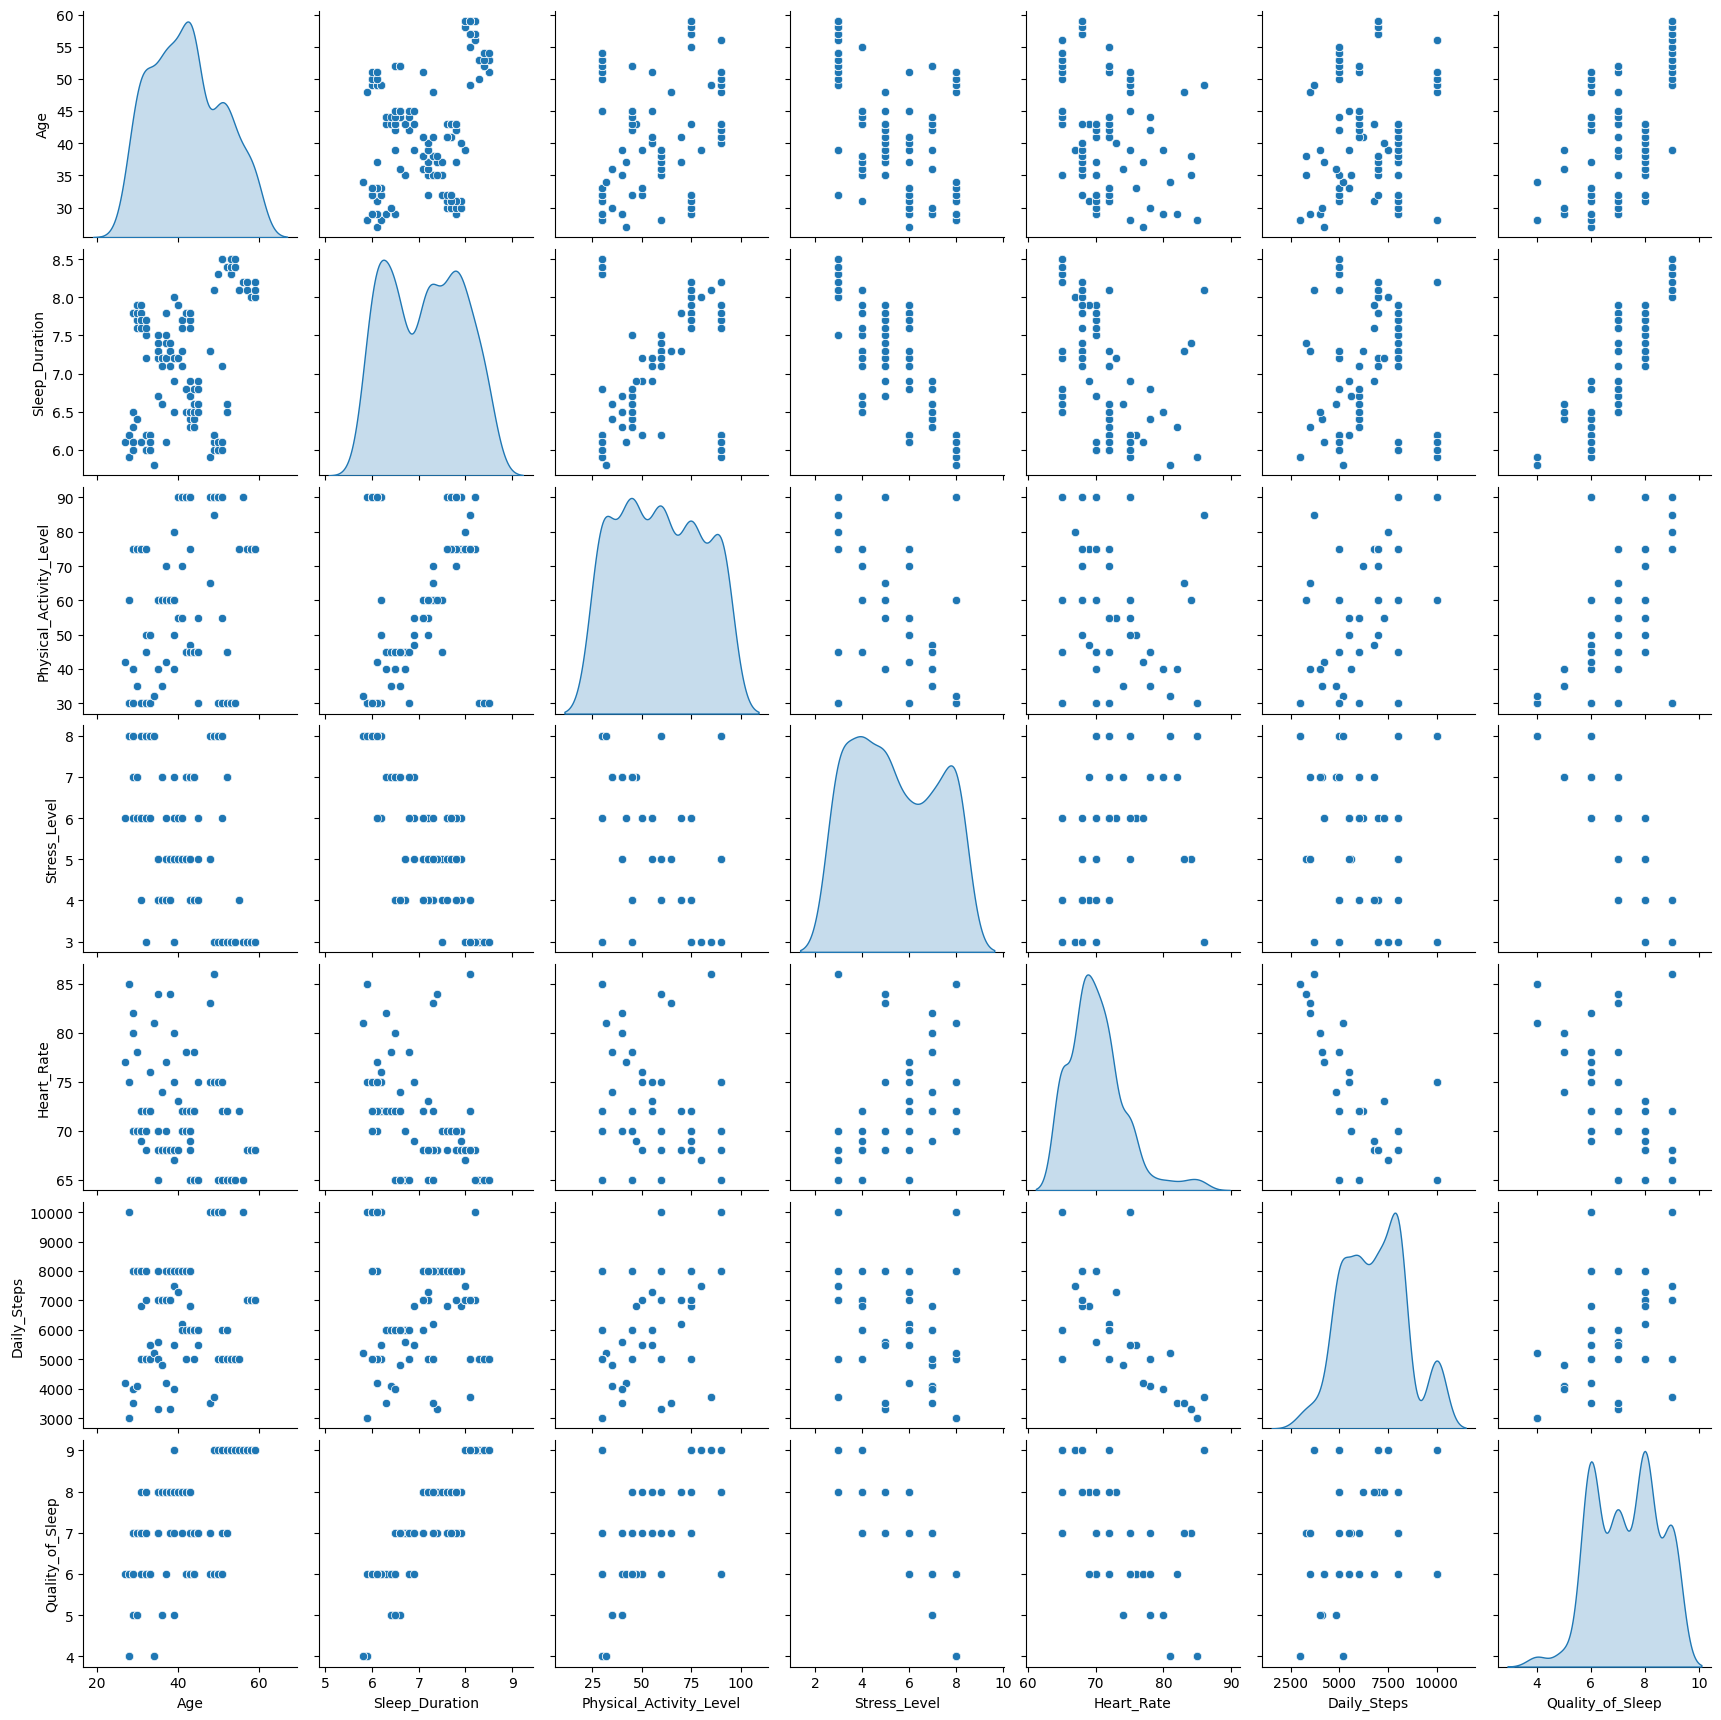

In [20]:
# Peform correlation between each variable numeric with pairplot kde
columns_ = ["Age", "Sleep_Duration", "Physical_Activity_Level", "Stress_Level", "Heart_Rate", "Daily_Steps", "Quality_of_Sleep"]
sns.pairplot(df[columns_], diag_kind = 'kde')
plt.show()

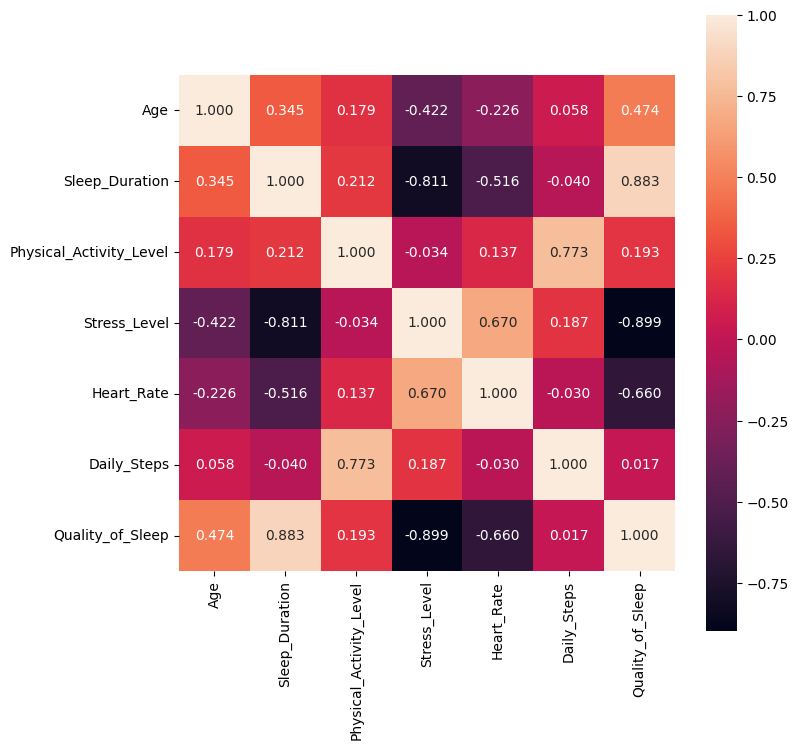

In [21]:
# Peform correlation between numerical calumns with heatmap
corr_ = df[columns_].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_, fmt= ".3f", annot=True, square=True)
plt.show()

### Statistical Test

In [22]:
# Import module
import scipy.stats as stats
from scipy.stats import ttest_ind,levene,kruskal
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.diagnostic import normal_ad


In [23]:
# Statistic test for Gender Category

male = df[df["Gender"] == "Male"]["Quality_of_Sleep"] # Create a variable for the "Male" category
female = df[df["Gender"] == "Female"]["Quality_of_Sleep"] # Create a variable for the "Female" category

n_male = male.shape[0] # Calculate the number of observations in the "Male" category
n_female = female.shape[0] # Calculate the number of observations in the "Female" category

result = ttest_ind(male, female, equal_var=True, alternative='less') # Perform a t-test

print(f"Numbers of samples for Male: {n_male}")
print(f"Numbers of samples for Female: {n_female}")
print("--"*20)

print("Hypothesis and significance level")
print("H0: Quality of Sleep Male is Equal than Female")
print("H1: Quality of Sleep Male is less than Female")
print("alpha = 0.05")
print("--" * 20)

print(f"Test Statistic: {result.statistic}")
print(f"p-Value: {result.pvalue}")
print("--" * 20)

#Conclusion
print("Conclution")
if result.pvalue<0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Numbers of samples for Male: 189
Numbers of samples for Female: 185
----------------------------------------
Hypothesis and significance level
H0: Quality of Sleep Male is Equal than Female
H1: Quality of Sleep Male is less than Female
alpha = 0.05
----------------------------------------
Test Statistic: -5.874547760454642
p-Value: 4.708223266344652e-09
----------------------------------------
Conclution
Reject the null hypothesis


In [24]:
# Statistical test for BMI category with ANOVA
print("Hypothesis and significance level:")
print("H0: Each BMI Category has Equal Quality of Sleep")
print("H1: Each BMI Category has Different Quality of Sleep")
print("Alpha = 0.05")

bmi_category = ols('Quality_of_Sleep ~ BMI_Category', data=df).fit()  # Creating a linear equation between Quality_of_Sleep and BMI_Category
aov_table = sm.stats.anova_lm(bmi_category)  # Performing ANOVA test

print("--" * 20)

print("Results of ANOVA test:")
print(aov_table)

print("--" * 20)

# Conclusion
print("Conclution")
if aov_table['PR(>F)'][0] < 0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

Hypothesis and significance level:
H0: Each BMI Category has Equal Quality of Sleep
H1: Each BMI Category has Different Quality of Sleep
Alpha = 0.05
----------------------------------------
Results of ANOVA test:
                 df      sum_sq    mean_sq          F        PR(>F)
BMI_Category    2.0   56.685333  28.342666  22.011391  9.257969e-10
Residual      371.0  477.713063   1.287636        NaN           NaN
----------------------------------------
Conclution
Reject the null hypothesis


In [25]:
# Statistical test for Sleep Disorder category with ANOVA
print("Hypothesis and significance level:")
print("H0: Each Sleep Disorder Category has Equal Quality of Sleep")
print("H1: Each Sleep Disorder Category has Different Quality of Sleep")
print("Alpha = 0.05")

sleep_disorder = ols('Quality_of_Sleep ~ Sleep_Disorder', data=df).fit()  # Creating a linear equation between Quality_of_Sleep and BMI_Category
aov_table = sm.stats.anova_lm(sleep_disorder)  # Performing ANOVA test

print("--" * 20)

print("Results of ANOVA test:")
print(aov_table)

print("--" * 20)

# Conclusion
print("Conclution")
if aov_table['PR(>F)'][0] < 0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

Hypothesis and significance level:
H0: Each Sleep Disorder Category has Equal Quality of Sleep
H1: Each Sleep Disorder Category has Different Quality of Sleep
Alpha = 0.05
----------------------------------------
Results of ANOVA test:
                   df      sum_sq    mean_sq          F        PR(>F)
Sleep_Disorder    2.0   69.214812  34.607406  27.600604  6.688642e-12
Residual        371.0  465.183584   1.253864        NaN           NaN
----------------------------------------
Conclution
Reject the null hypothesis


### Build Model OLS Regression

In [26]:
#Import the module for the linear regression model
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats

In [27]:
#Construct the model
lm = smf.ols('Quality_of_Sleep ~ Gender + Age + Sleep_Duration + Stress_Level + BMI_Category + Heart_Rate + Sleep_Disorder', 
             data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       Quality_of_Sleep   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     631.8
Date:                Mon, 21 Aug 2023   Prob (F-statistic):          4.10e-216
Time:                        22:18:57   Log-Likelihood:                -71.833
No. Observations:                 374   AIC:                             163.7
Df Residuals:                     364   BIC:                             202.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

Interpretasi Model OLS:
- Nilai R-squared sebesar 0.940, yang mengindikasikan bahwa model mampu menjelaskan sekitar 94% variabilitas dalam variabel terikat (Quality_of_Sleep) berdasarkan variabel-variabel prediktor yang ada dalam model.
- Nilai F Statistic sangat rendah (4.10e-216) yang berarti Secara keseluruhan semua prediktor (Gender, BMI Category, Sleep Disorder, Age, Sleep Duration, Stress Level, Heart Rate) memberikan kontribusi secara signifikan terhadap variasi variable terikat (Quality of Sleep)
- Dilihat dari nilai P-value masing-masing prediktor terhadap variable terikat, prediktor Gender, BMI Category, Sleep Disorder, Age, Sleep Duration, dan Stress Level memiliki nilai lebih kecil dari alpha=0.05 yang berarti prediktor tersebut berkontribusi secara signifikan terhadap variable terikat. sementara Prediktor Heart Rate memiliki nilai P-Value lebih besar dari Alpha 0.05 yang berarti  tidak berkontribusi secara signifikan terhadap variasi dalam variabel terikat.

berikut interpretasi masing-masing prediktor terhadap variable terikat (Quality of Sleep)
- Intercept (Intersepsi):
Koefisien Intercept ialah 6.6580. Dapat diartikan nilai yang diharapkan dari variabel Quality_of_Sleep ketika semua variabel prediktor bernilai nol. Dalam konteks ini, interpretasi Intersepsi mungkin tidak memiliki arti praktis yang signifikan, karena beberapa variabel seperti "Age" dan "Stress_Level" tidak mungkin bernilai nol dalam kasus nyata.

- Gender (Jenis Kelamin):
Koefisien untuk jenis kelamin (laki-laki) adalah 0.2904. Ini dapat diartikan bahwa seseorang berjenis kelamin laki-laki memiliki rata-rata skor Quality_of_Sleep yang lebih tinggi sebesar 0.2904 dibandingkan seseorang berjenis kelamin perempuan, dengan pertimbangan nilai-nilai variabel prediktor lain tetap konstan.

- Kategori BMI
Koefisien untuk kategori BMI Obese dan BMI Overweight adalah -0.7081 dan -0.6219. Ini berarti bahwa individu yang tergolong kategori Obesitas  dan Kegemukan (Overweight) memiliki rata-rata skor Quality_of_Sleep yang lebih rendah dibandingkan dengan individu yang memiliki BMI normal, dengan mengontrol variabel prediktor lainnya.

- Sleep Disorder (Gangguan Tidur)
Koefisien untuk gangguan tidur tipe Apnea dan tidak mengalami gangguan tidur (Sleep Good) adalah 0.3514 dan 0.3305. Ini berarti  seseorang yang mengalami gangguan tidur tipe Apnea atau tidak mengalami gangguan tidur (Sleep Good) memiliki rata-rata skor Quality_of_Sleep yang lebih tinggi dibandingkan dengan seseorang yang mengalami gangguan tidur tipe insomnia, dengan mengontrol variabel prediktor lainnya.

- Age (Usia):
Koefisien untuk usia (Age) adalah 0.0514. Ini berarti dengan setiap tahun bertambahnya usia, rata-rata skor Quality_of_Sleep meningkat sebesar 0.0514, dengan asumsi variabel prediktor lainnya tetap konstan.

- Sleep Duration (Durasi Tidur):
Koefisien untuk durasi tidur (Sleep_Duration) adalah 0.1829. Ini berarti dengan setiap peningkatan unit dalam durasi tidur, rata-rata skor Quality_of_Sleep meningkat sebesar 0.1829, dengan mengontrol variabel prediktor lainnya.

- Stress Level (Tingkat Stres):
Koefisien untuk tingkat stres (Stress_Level) adalah -0.4102. Ini berarti dengan setiap peningkatan unit dalam tingkat stres, rata-rata skor Quality_of_Sleep menurun sebesar 0.4102, dengan mengontrol variabel prediktor lainnya.

- Heart Rate (Detak Jantung):
Koefisien untuk detak jantung (Heart_Rate) adalah -0.0108. Nilai p-value (0.219) menunjukkan bahwa koefisien ini tidak signifikan secara statistik pada tingkat signifikansi 0.05. Ini berarti bahwa detak jantung mungkin tidak memiliki pengaruh yang signifikan terhadap variabel Quality_of_Sleep dalam model ini.